# Study the data statistics of the pap dataset (dev).
29.11.2023

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Please replace the following paths with your own paths if you are using different ones.
PROJECT_PATH = "<root_dir_of_this_repo>"
DATA_PATH = PROJECT_PATH + "datasets/pap/train-dev-test-split/binary/"
CACHE_PATH = PROJECT_PATH + "cache/"

## Train

In [3]:
dev_set_df = pd.read_csv(DATA_PATH + "dev.csv", sep=',')
dev_set_df

,text,original_label,label
0,method seizes bacterium,implausible,0
1,technician visits community,plausible,1
2,inclusion expands range,plausible,1
3,pencil puts norm,implausible,0
4,solution musters team,implausible,1
...,...,...,...
211,variable represents domain,plausible,1
212,circuit transcends driver,implausible,1
213,arrow wears chest,implausible,0
214,blast leaves person,plausible,0


### Check texts

In [4]:
texts = dev_set_df['text'].tolist()
print(len(texts))
texts_set = list(set(texts))
print(len(texts_set))

216
216


In [5]:
# Get vocabulary from texts.

from itertools import chain
words = [text.split(" ") for text in texts]
words = list(chain(*words))
print(len(words))

vocab = list(set(words))
print(len(vocab))

648
553


### Check original labels

In [6]:
original_labels = dev_set_df['original_label'].tolist()
print(len(original_labels))
original_labels_set = list(set(original_labels))
print(len(original_labels_set))
original_labels_set

216
2


['plausible', 'implausible']

In [7]:
original_label_counter = dict(Counter(original_labels))

# Sort the data in descending order.
original_label_counter = {k: v for k, v in sorted(original_label_counter.items(), key=lambda item: item[1], reverse=True)}
original_label_counter

{'implausible': 110, 'plausible': 106}

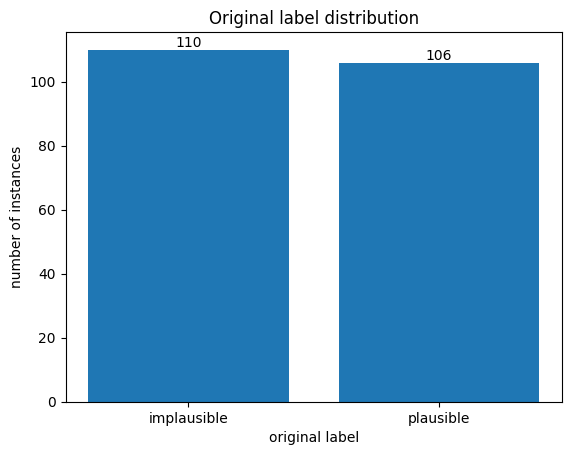

In [8]:
# Create a bar diagram
plt.bar(original_label_counter.keys(), original_label_counter.values())

# Add title and labels
plt.title('Original label distribution')
plt.xlabel('original label')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in original_label_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()

### Check labels

In [9]:
labels = dev_set_df['label'].tolist()
print(len(labels))
labels_set = list(set(labels))
print(len(labels_set))
labels_set

216
2


[0, 1]

In [10]:
label_counter = dict(Counter(labels))

# Sort the data in descending order.
label_counter = {k: v for k, v in sorted(label_counter.items(), key=lambda item: item[1], reverse=True)}
label_counter

{1: 154, 0: 62}

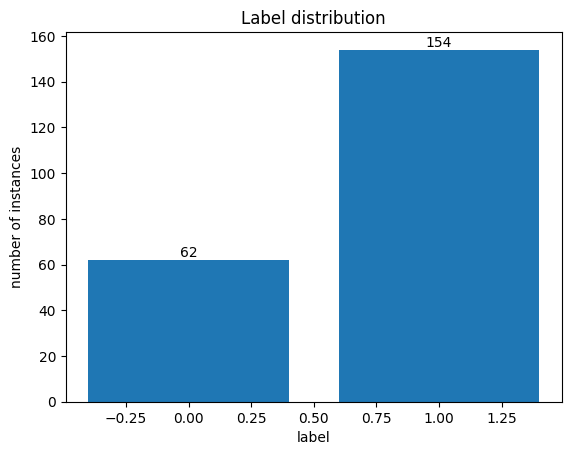

In [11]:
# Create a bar diagram
plt.bar(label_counter.keys(), label_counter.values())

# Add title and labels
plt.title('Label distribution')
plt.xlabel('label')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in label_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()